In [13]:

import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
import pytimetk as tk
import matplotlib.pyplot as plt

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score

[*********************100%***********************]  1 of 1 completed


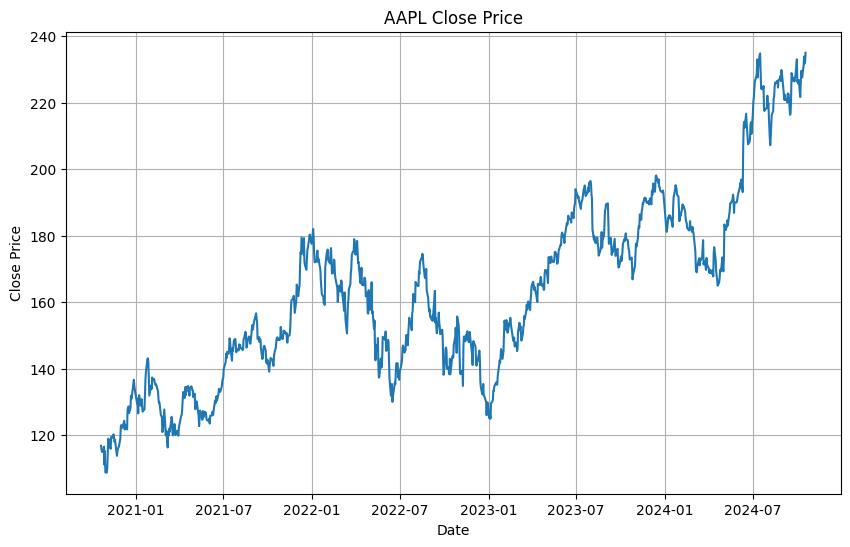

In [17]:
SYMBOL = "AAPL"
START = "2020-10-21"
END = "2024-10-20"
TRAIN_UNTIL = "2022-09-30"

# Load the data using yfinance
data = yf.download(SYMBOL, start=START, end=END)

# Reset index and select relevant columns
df = data.reset_index()[['Date', 'Open', 'High', 'Low', 'Close']]

# Plot the 'Close' price using matplotlib
plt.figure(figsize=(10,6))
plt.plot(df['Date'], df['Close'])
plt.title('AAPL Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

Feature Engineering


In [19]:
#Distance from moving averages

moving_avgs = [10, 20, 30, 50, 100]
for avg in moving_avgs:
    df[f'feat_dist_from_ma_{avg}'] = df['Close']/df['Close'].rolling(avg).mean() - 1

In [20]:
#Distance from n day maximun/minimum

for i in [6, 10, 15, 20, 30, 50, 100]:
    df[f'feat_dist_from_max_{i}'] = df['Close']/df['High'].rolling(i).max() - 1
    df[f'feat_dist_from_min_{i}'] = df['Close']/df['Low'].rolling(i).min() - 1 

In [21]:
#Price Distance
for m in [6, 10, 15, 20, 30, 50, 100]:
    df[f'feat_price_dist_{m}'] = df['Close']/df['Close'].shift(m) - 1

In [24]:
df


,Date,Open,High,Low,Close,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,feat_dist_from_ma_50,feat_dist_from_ma_100,...,feat_dist_from_min_50,feat_dist_from_max_100,feat_dist_from_min_100,feat_price_dist_6,feat_price_dist_10,feat_price_dist_15,feat_price_dist_20,feat_price_dist_30,feat_price_dist_50,feat_price_dist_100
0,2020-10-21,116.669998,118.709999,116.449997,116.870003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-22,117.449997,118.040001,114.589996,115.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-10-23,116.389999,116.550003,114.279999,115.040001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-10-26,114.010002,116.550003,112.879997,115.050003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-10-27,115.489998,117.279999,114.540001,116.599998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,2024-10-14,228.699997,231.729996,228.600006,231.300003,0.018786,0.020422,0.028684,0.034128,0.060362,...,0.180102,-0.024997,0.239351,0.019841,-0.007296,0.021327,0.069249,0.010044,0.052033,0.202495
1001,2024-10-15,233.610001,237.490005,232.369995,233.850006,0.026563,0.027804,0.038320,0.043236,0.069946,...,0.163028,-0.015327,0.253014,0.054851,0.033774,0.028500,0.078694,0.049737,0.117456,0.224987
1002,2024-10-16,231.600006,232.119995,229.839996,231.779999,0.015248,0.016229,0.027466,0.031742,0.058301,...,0.123020,-0.024043,0.232610,0.026620,0.022048,0.023899,0.050251,0.049491,0.118467,0.240261
1003,2024-10-17,233.429993,233.850006,230.520004,232.149994,0.013990,0.017120,0.027623,0.031339,0.057953,...,0.111670,-0.022485,0.227657,0.011371,0.028714,0.020350,0.014331,0.043934,0.106424,0.221971


In [26]:
# Target Variable (Predict price above 20SMA in 5 days)
df['target_ma'] = df['Close'].rolling(20).mean()
df['price_above_ma'] = df['Close'] > df['target_ma']
df['target'] = df['price_above_ma'].astype(int).shift(-5)
df.head()

,Date,Open,High,Low,Close,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,feat_dist_from_ma_50,feat_dist_from_ma_100,...,feat_price_dist_6,feat_price_dist_10,feat_price_dist_15,feat_price_dist_20,feat_price_dist_30,feat_price_dist_50,feat_price_dist_100,target_ma,price_above_ma,target
0,2020-10-21,116.669998,118.709999,116.449997,116.870003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
1,2020-10-22,117.449997,118.040001,114.589996,115.750000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
2,2020-10-23,116.389999,116.550003,114.279999,115.040001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
3,2020-10-26,114.010002,116.550003,112.879997,115.050003,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
4,2020-10-27,115.489998,117.279999,114.540001,116.599998,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0


In [28]:
df = df.dropna()
df

,Date,Open,High,Low,Close,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,feat_dist_from_ma_50,feat_dist_from_ma_100,...,feat_price_dist_6,feat_price_dist_10,feat_price_dist_15,feat_price_dist_20,feat_price_dist_30,feat_price_dist_50,feat_price_dist_100,target_ma,price_above_ma,target
100,2021-03-17,124.050003,125.860001,122.339996,124.760002,0.025742,0.010080,-0.020525,-0.038629,-0.006117,...,0.030308,0.022120,-0.004707,-0.046469,-0.075783,-0.035932,0.067511,123.515000,True,0.0
101,2021-03-18,122.879997,123.180000,120.320000,120.529999,-0.009361,-0.020527,-0.050402,-0.069722,-0.040181,...,0.004584,0.003330,-0.003802,-0.070773,-0.100119,-0.079994,0.041296,123.055999,False,0.0
102,2021-03-19,119.900002,121.430000,119.680000,119.989998,-0.012639,-0.020985,-0.050316,-0.072944,-0.044857,...,-0.016153,-0.011777,-0.010473,-0.076076,-0.126647,-0.052212,0.043028,122.562000,False,0.0
103,2021-03-22,120.330002,123.870003,120.260002,123.389999,0.009499,0.007829,-0.019949,-0.045564,-0.018444,...,0.019499,0.060416,-0.034432,-0.020714,-0.097762,-0.057516,0.072490,122.431499,True,0.0
104,2021-03-23,123.330002,124.239998,122.139999,122.540001,0.001357,0.002245,-0.022984,-0.050743,-0.025666,...,-0.011694,0.011975,-0.020620,-0.026379,-0.104959,-0.072018,0.050943,122.265499,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-10-07,224.500000,225.690002,221.330002,221.690002,-0.023048,-0.013523,-0.013659,-0.004756,0.025255,...,-0.026779,-0.021107,0.024824,0.003531,-0.022703,0.017113,0.182788,224.729000,False,1.0
996,2024-10-08,224.300003,225.979996,223.250000,225.770004,-0.004366,0.003369,0.004704,0.012876,0.042386,...,-0.031030,-0.007037,0.041423,0.025714,-0.006206,0.034503,0.190017,225.012000,True,1.0
997,2024-10-09,225.229996,229.750000,224.830002,229.539993,0.010847,0.018566,0.021252,0.028798,0.057853,...,0.014721,0.014004,0.040101,0.030899,0.006622,0.049086,0.209123,225.356000,True,1.0
998,2024-10-10,227.779999,229.500000,227.169998,229.039993,0.007970,0.014936,0.018642,0.025917,0.053647,...,0.009966,0.006681,0.000743,0.028146,0.011259,0.031340,0.206299,225.669499,True,1.0


In [44]:
feat_cols = [col for col in df.columns if 'feat' in col]
train_until = TRAIN_UNTIL
x_train = df[df['Date'] <= train_until][feat_cols]
y_train = df[df['Date'] <= train_until]['target']

x_test = df[df['Date'] > train_until][feat_cols]
y_test = df[df['Date'] > train_until]['target']


In [45]:


# Changing the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define the feature columns (assuming 'feat' in column name indicates features)
feat_cols = [col for col in df.columns if 'feat' in col]

# Define the train/test split date
train_until = pd.to_datetime(TRAIN_UNTIL)

# Splitting the data into training and testing sets based on the 'train_until' date
x_train = df[df['Date'] <= train_until][feat_cols]
y_train = df[df['Date'] <= train_until]['target']

x_test = df[df['Date'] > train_until][feat_cols]
y_test = df[df['Date'] > train_until]['target']



In [46]:
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    class_weight='balanced'
)

model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

In [47]:
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [49]:
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")

print(f"Train Precision: {precision_score(y_train, y_train_pred)}")
print(f"Test Precision: {precision_score(y_test, y_test_pred)}")

print(f"Train ROC AUC: {roc_auc_score(y_train, clf.predict_proba(x_train)[:, 1])}")
print(f"Test ROC AUC: {roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1])}")


Train Accuracy: 0.8256410256410256
Test Accuracy: 0.7529411764705882
Train Precision: 0.8411214953271028
Test Precision: 0.8065573770491803
Train ROC AUC: 0.9382699660152931
Test ROC AUC: 0.7707870452960544


In [50]:
df_test = df[df['Date'] > train_until].reset_index(drop=True)
df_test['pred_prob'] = clf.predict_proba(x_test)[:, 1]
df_test['pred'] = df_test['pred_prob'] > 0.5

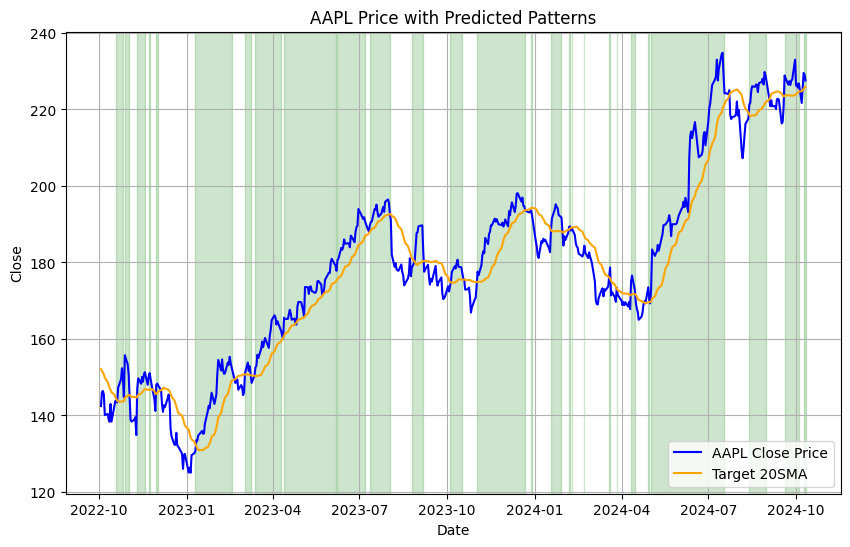

In [55]:


# Ensure the date column is in datetime format
df_test['Date'] = pd.to_datetime(df_test['Date'])

# Create a new figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the Close price
ax.plot(df_test['Date'], df_test['Close'], label=f"{SYMBOL} Close Price", color='blue')

# Plot the 20-period moving average (Target 20SMA)
ax.plot(df_test['Date'], df_test['target_ma'], label='Target 20SMA', color='orange')

# Find and highlight areas where 'pred' is True
df_pattern = (
    df_test[df_test['pred']]
    .groupby((~df_test['pred']).cumsum())['Date']
    .agg(['first', 'last'])
)

# Add vertical shaded regions for the predicted patterns
for idx, row in df_pattern.iterrows():
    ax.axvspan(row['first'], row['last'], color='green', alpha=0.2)

# Set title and labels
ax.set_title(f"{SYMBOL} Price with Predicted Patterns")
ax.set_xlabel("Date")
ax.set_ylabel("Close")

# Enable grid for better readability
ax.grid(True)
ax.legend()
plt.show()
